In [8]:
import pandas as pd
import seaborn as sns

# Load the dataset

In [2]:
test_df = pd.read_csv("Data/test.csv")
train_df = pd.read_csv("Data/train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

- Check value counts for PClass, SibSp, Parch, Ticket, Fare, Cabin, Embarked
- Check scatters and correlations

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age needs to be int
- Missing data in Age and Cabin
- 891 observation
- Label column is called survived

In [11]:
train_df['SibSp'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

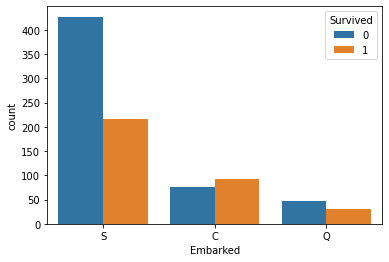

In [29]:
sns.countplot(data=train_df, x="Embarked", hue="Survived") 

In [20]:
train_df['Survived'].value_count()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

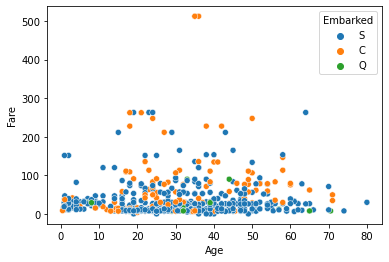

In [15]:
sns.scatterplot(data=train_df, x="Age", y="Fare", hue="Embarked")

# Machine Learning (NEW HORIZONS)

- Q1: What are my features?
- Q2: What are my labels?
- Q3: Is adil gae?

In [54]:
adil = train_df[["Name", "Age", "SibSp","Parch"]].copy()
adil.sort_values(by=["Name"], inplace=True)
adil.head()

,Name,Age,SibSp,Parch
845,"Abbing, Mr. Anthony",42.0,0,0
746,"Abbott, Mr. Rossmore Edward",16.0,1,1
279,"Abbott, Mrs. Stanton (Rosa Hunt)",35.0,1,1
308,"Abelson, Mr. Samuel",30.0,1,0
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0


In [50]:
adil['Name'].value_counts()

Gavey, Mr. Lawrence                                              1
Fynney, Mr. Joseph J                                             1
Goodwin, Master. William Frederick                               1
Lines, Miss. Mary Conover                                        1
Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)            1
                                                                ..
Morley, Mr. Henry Samuel ("Mr Henry Marshall")                   1
McEvoy, Mr. Michael                                              1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)                 1
Kallio, Mr. Nikolai Erland                                       1
Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)    1
Name: Name, Length: 891, dtype: int64

In [41]:
adil[adil['Name']=="Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)"]

,Name,SibSp
779,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",0


In [55]:
adil[adil["SibSp"]>3]

,Name,Age,SibSp,Parch
850,"Andersson, Master. Sigvard Harald Elias",4.0,4,2
813,"Andersson, Miss. Ebba Iris Alfrida",6.0,4,2
119,"Andersson, Miss. Ellis Anna Maria",2.0,4,2
68,"Andersson, Miss. Erna Alexandra",17.0,4,2
541,"Andersson, Miss. Ingeborg Constanzia",9.0,4,2
542,"Andersson, Miss. Sigrid Elisabeth",11.0,4,2
182,"Asplund, Master. Clarence Gustaf Hugo",9.0,4,2
261,"Asplund, Master. Edvin Rojj Felix",3.0,4,2
233,"Asplund, Miss. Lillian Gertrud",5.0,4,2
480,"Goodwin, Master. Harold Victor",9.0,5,2


from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

In [70]:
col_names = train_df.columns.to_list()
col_names.remove("Cabin")

In [74]:
col_names.remove("PassengerId")

In [75]:
train_df = train_df[col_names]

In [76]:
train_df.head()

,Survived,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,0,A/5 21171,7.2500,S
1,1,1,female,38.0,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,0,113803,53.1000,S
4,0,3,male,35.0,0,373450,8.0500,S


In [78]:
train_df.dropna(inplace=True)

In [79]:
train_df.head()

,Survived,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,0,A/5 21171,7.2500,S
1,1,1,female,38.0,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,0,113803,53.1000,S
4,0,3,male,35.0,0,373450,8.0500,S


In [82]:
features = train_df.columns.to_list()
features.remove("Survived")
features.remove("Sex")
features.remove("Ticket")
features.remove("Embarked")

X_train = train_df[features]
y_train = train_df["Survived"]

In [96]:
test_df.dropna(inplace=True)
X_test = test_df[features]

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [85]:
lr.score(X_train, y_train)

0.7148876404494382

In [97]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)